<a href="https://colab.research.google.com/github/NagababuVeganti/Data-Structures/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

In this assignment, we will focus on healthcare. This data set is made available by MIT. It contains data about 9,026 heartbeat measurements. Each row represents a single measurement (captured on a timeline). There are a total of 80 data points (columns). This is a multiclass classification task: predict whether the measurement represents a normal heartbeat or other anomalies. 

## Description of Variables

You will use the **hearbeat_cleaned.csv** data set for this assignment. Each row represents a single measurement. Columns labeled as T1 from T80 are the time steps on the timeline (there are 80 time steps, each time step has only one measurement). 

The last column is the target variable. It shows the label (category) of the measurement as follows:<br>
0 = Normal<br>
1 = Supraventricular premature beat<br>
2 = Premature ventricular contraction<br>
3 = Fusion of ventricular and normal beat<br>
4 = Unclassifiable beat

## Goal

Use the data set **hearbeat_cleaned.csv** to predict the column called **Target**. The input variables are columns labeled as **T1 to T80**. 

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code matters for your grade. **Readability and organization of your code is also important.** You may lose points for submitting unreadable/undecipherable code. Therefore, use markdown cells to create sections, and use comments where necessary.


# Note:

The data is cleaned up. There are no unqueal length sequences. And, there is no zero padding. So, you shouldn't use any `Masking` layer (like I mentioned in the lecture). 

# Read and Prepare the Data (1 points)

In [ ]:
# Insert as many cells as you need for data prep

# **Common Imports**

In [1]:
import numpy as np
import pandas as pd 
import keras
import tensorflow as tf
np.random.seed(46046025)

## **Reading Data**

In [2]:
data= pd.read_csv('heartbeat_cleaned.csv',index_col=0)

In [3]:
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T72,T73,T74,T75,T76,T77,T78,T79,T80,Target
0,0.987,0.892,0.461,0.1130,0.1490,0.1900,0.1650,0.1620,0.1470,0.1380,...,0.1970,0.1970,0.1960,0.2030,0.201,0.1990,0.2010,0.205,0.2080,0.0
1,1.000,0.918,0.621,0.1330,0.1050,0.1250,0.1170,0.0898,0.0703,0.0781,...,0.1950,0.1910,0.1520,0.1720,0.207,0.2110,0.2070,0.207,0.1720,0.0
2,1.000,0.751,0.143,0.1040,0.0961,0.0519,0.0442,0.0416,0.0364,0.0857,...,0.2260,0.2420,0.2440,0.2860,0.468,0.8160,0.9770,0.452,0.0519,0.0
3,1.000,0.740,0.235,0.0464,0.0722,0.0567,0.0103,0.0155,0.0284,0.0155,...,0.0851,0.0747,0.0515,0.0593,0.067,0.0361,0.1210,0.451,0.8690,0.0
4,1.000,0.833,0.309,0.0191,0.1010,0.1200,0.1040,0.0874,0.0765,0.0765,...,0.2050,0.4210,0.8030,0.9510,0.467,0.0000,0.0519,0.082,0.0628,0.0


**Plotting Few Rows to see trends**

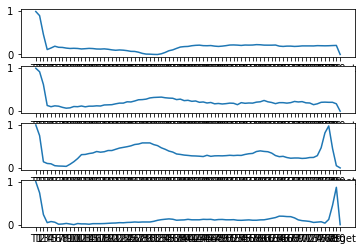

In [4]:
import matplotlib.pyplot as plt
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4)
ax1.plot(data.iloc[0])
ax2.plot(data.iloc[1])
ax3.plot(data.iloc[2])
ax4.plot(data.iloc[3])

**As mentioned in the description ecah. row in the  dataset represents a single measurement (captured on a timeline). There are a total of 80 data points (columns).**

In [42]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3)

## Separate the target variable (we don't want to transform it)

In [43]:
train_target = train_set[['Target']]
test_target = test_set[['Target']]

train_inputs = train_set.drop(['Target'], axis=1)
test_inputs = test_set.drop(['Target'], axis=1)

# **Encoding the Target column**

In [44]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

train_y = ord_enc.fit_transform(train_target)

train_y

array([[4.],
       [2.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [45]:
#Applying it for test also
test_y = ord_enc.transform(test_target)

test_y

array([[4.],
       [2.],
       [4.],
       ...,
       [0.],
       [0.],
       [0.]])

# **Data Sanity Checks**

 **Check for Missing Values**

In [46]:
train_set.isna().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
         ..
T77       0
T78       0
T79       0
T80       0
Target    0
Length: 81, dtype: int64

In [47]:
test_set.isna().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
         ..
T77       0
T78       0
T79       0
T80       0
Target    0
Length: 81, dtype: int64

We can conclude that data set is clean 

# Find the baseline (0.5 point)

In [48]:
train_target.value_counts()/len(train_target)

Target
0.0       0.572864
4.0       0.203338
2.0       0.160804
1.0       0.054738
3.0       0.008256
dtype: float64

# Build a cross-sectional shallow model using Keras (with only one hidden layer) (2 points)

In [49]:
import tensorflow as tf
from tensorflow import keras

# fix random seed for reproducibility
tf.random.set_seed(46046025)

In [50]:
#Checking the shape of the datset to define the input dimenssions of the model

train_inputs.shape

(5572, 80)

# **Model 1**(Adam Optimizer)

In [51]:
#Define the model: for multi-class

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=80))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))
#final layer: there has to be 5 nodes with softmax layer since we have 5 categories in the target label.


In [52]:
# Compile model

#Optimizer using Adam optimizer
adam = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [53]:
# Fit the model

history = model.fit(train_inputs, train_y, 
                    validation_data=(test_inputs, test_y), 
                    epochs=50, batch_size=500)

Epoch 1/50
12/12 [==============================] - 1s 19ms/step - loss: 1.1300 - accuracy: 0.6018 - val_loss: 0.8129 - val_accuracy: 0.7701
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7687 - accuracy: 0.7717 - val_loss: 0.6690 - val_accuracy: 0.7718
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.7854 - val_loss: 0.6360 - val_accuracy: 0.8074
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6486 - accuracy: 0.8001 - val_loss: 0.5988 - val_accuracy: 0.8107
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6083 - accuracy: 0.8004 - val_loss: 0.5521 - val_accuracy: 0.8204
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5582 - accuracy: 0.8157 - val_loss: 0.5090 - val_accuracy: 0.8162
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5220 - accuracy: 0.8204 - val_loss: 0.4669 - val_accuracy: 0.8559
Epoch 8/50
12/12 [=

In [56]:
# evaluate the model

scores = model.evaluate(test_inputs, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.28153911232948303, 0.9229480624198914]

In [57]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


loss: 0.28
accuracy: 92.29%


`**Note:**` In the above model i tried different epochs and i found that as we increase the number of epochs the accuray also started to increse, when i tried with 20 epochs i got an accuracy of `90.2%` and when i increaed the number of epochs to 50 the accuracy increased to `92.22%` 

# Sub-Model (Optimizer: RMSprop)

I looked up the Keras documentation to find other available optimizers(https://keras.io/api/optimizers/)

In [58]:
#Define the model: for multi-class

sub_model = keras.models.Sequential()

sub_model.add(keras.layers.Input(shape=80))
sub_model.add(keras.layers.Dense(150, activation='relu'))
sub_model.add(keras.layers.Dense(5, activation='softmax'))
#final layer: there has to be 5 nodes with softmax layer since we have 5 categories in the target label.


In [59]:
# Compile model

#Optimizer using Adam optimizer
adam = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.02)

sub_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [60]:
# Fit the model

history = sub_model.fit(train_inputs, train_y, 
                    validation_data=(test_inputs, test_y), 
                    epochs=50, batch_size=500)

Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 1.3819 - accuracy: 0.4885 - val_loss: 1.1462 - val_accuracy: 0.5779
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.9282 - accuracy: 0.6734 - val_loss: 0.9052 - val_accuracy: 0.7508
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.7996 - accuracy: 0.7457 - val_loss: 0.6518 - val_accuracy: 0.8103
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 0.7148 - accuracy: 0.7678 - val_loss: 0.7967 - val_accuracy: 0.7399
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 0.6748 - accuracy: 0.7721 - val_loss: 0.5718 - val_accuracy: 0.8082
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6222 - accuracy: 0.7850 - val_loss: 0.5581 - val_accuracy: 0.8178
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5791 - accuracy: 0.8062 - val_loss: 0.7139 - val_accuracy: 0.7265
Epoch 8/50
12/12 [=

In [134]:
# evaluate the model

scores = sub_model.evaluate(test_inputs, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.4882899522781372, 0.8701842427253723]

In [135]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (sub_model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (sub_model.metrics_names[1], scores[1]*100))


loss: 0.49
accuracy: 87.02%


From the above we can see that Adam optimizer perforemed better compared to RMSprop for same number of Epochs

# Build a cross-sectional deep model using Keras (with two or more hidden layers) (2 points)

# **Model 1 (Adam Optimizer)**

In [63]:
#Define the model: for multi-class

sub_model_multi = keras.models.Sequential()

sub_model_multi.add(keras.layers.Input(shape=80))
sub_model_multi.add(keras.layers.Dense(75, activation='relu'))
sub_model_multi.add(keras.layers.Dense(150, activation='relu'))
sub_model_multi.add(keras.layers.Dense(75, activation='relu'))
sub_model_multi.add(keras.layers.Dense(5, activation='softmax'))
#final layer: there has to be 5 nodes with softmax layer since we have 5 categories in the target label.


In [64]:
# Compile model

#Optimizer using Adam optimizer
adam = keras.optimizers.Adam(learning_rate=0.01)

sub_model_multi.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [65]:
# Fit the model

history = sub_model_multi.fit(train_inputs, train_y, 
                    validation_data=(test_inputs, test_y), 
                    epochs=50, batch_size=500)

Epoch 1/50
12/12 [==============================] - 1s 25ms/step - loss: 1.0182 - accuracy: 0.6226 - val_loss: 0.8204 - val_accuracy: 0.7186
Epoch 2/50
12/12 [==============================] - 0s 10ms/step - loss: 0.6994 - accuracy: 0.7548 - val_loss: 0.5824 - val_accuracy: 0.8040
Epoch 3/50
12/12 [==============================] - 0s 11ms/step - loss: 0.5734 - accuracy: 0.7997 - val_loss: 0.4912 - val_accuracy: 0.8367
Epoch 4/50
12/12 [==============================] - 0s 15ms/step - loss: 0.4801 - accuracy: 0.8439 - val_loss: 0.4705 - val_accuracy: 0.8601
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.4348 - accuracy: 0.8684 - val_loss: 0.3964 - val_accuracy: 0.8756
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 0.4000 - accuracy: 0.8699 - val_loss: 0.4391 - val_accuracy: 0.8543
Epoch 7/50
12/12 [==============================] - 0s 10ms/step - loss: 0.3765 - accuracy: 0.8837 - val_loss: 0.3509 - val_accuracy: 0.9095
Epoch 8/50
12

In [136]:
# evaluate the model

scores = sub_model_multi.evaluate(test_inputs, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.22491976618766785, 0.9388609528541565]

# **Sub Model with more Hidden Layers (Optimizer: RMSprop)**

In [67]:
#Defining the model: for multi-class

sub_model_multi_1 = keras.models.Sequential()

sub_model_multi_1.add(keras.layers.Input(shape=80))
sub_model_multi_1.add(keras.layers.Dense(25, activation='relu'))
sub_model_multi_1.add(keras.layers.Dense(75, activation='relu'))
sub_model_multi_1.add(keras.layers.Dense(150, activation='relu'))
sub_model_multi_1.add(keras.layers.Dense(75, activation='relu'))
sub_model_multi_1.add(keras.layers.Dense(25, activation='relu'))
sub_model_multi_1.add(keras.layers.Dense(5, activation='softmax'))
#final layer: there has to be 5 nodes with softmax layer since we have 5 categories in the target label.


In [68]:
# Compile model

#Optimizer using Adam optimizer
adam = keras.optimizers.RMSprop(learning_rate=0.01)

sub_model_multi_1.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [69]:
# Fit the model

history = sub_model_multi_1.fit(train_inputs, train_y, 
                    validation_data=(test_inputs, test_y), 
                    epochs=75, batch_size=500)

Epoch 1/75
12/12 [==============================] - 2s 51ms/step - loss: 1.3634 - accuracy: 0.4691 - val_loss: 1.0859 - val_accuracy: 0.6034
Epoch 2/75
12/12 [==============================] - 0s 18ms/step - loss: 1.1615 - accuracy: 0.5560 - val_loss: 1.1583 - val_accuracy: 0.4883
Epoch 3/75
12/12 [==============================] - 0s 23ms/step - loss: 1.0905 - accuracy: 0.5711 - val_loss: 0.8549 - val_accuracy: 0.6859
Epoch 4/75
12/12 [==============================] - 0s 23ms/step - loss: 0.8905 - accuracy: 0.6834 - val_loss: 0.8089 - val_accuracy: 0.7450
Epoch 5/75
12/12 [==============================] - 0s 22ms/step - loss: 0.9075 - accuracy: 0.7091 - val_loss: 0.6382 - val_accuracy: 0.7839
Epoch 6/75
12/12 [==============================] - 0s 16ms/step - loss: 0.9951 - accuracy: 0.6531 - val_loss: 0.7155 - val_accuracy: 0.7617
Epoch 7/75
12/12 [==============================] - 0s 14ms/step - loss: 0.6958 - accuracy: 0.7654 - val_loss: 0.9790 - val_accuracy: 0.6311
Epoch 8/75
12

In [137]:
# evaluate the model

scores = sub_model_multi_1.evaluate(test_inputs, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.34219375252723694, 0.9036850929260254]

In [138]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (sub_model_multi_1.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (sub_model_multi_1.metrics_names[1], scores[1]*100))


loss: 0.34
accuracy: 90.37%


# Build a sequential shallow LSTM Model (with only one LSTM layer) (2 points)

# Model 1

In [90]:
#Convert input variables to a 2-D array with float data type
train_x= np.array(train_inputs)
test_x= np.array(test_inputs)

train_x = train_x.astype(np.float32)
test_x = test_x.astype(np.float32)

train_y = np.array(train_y)
train_y = np.reshape(train_y,(train_y.shape[0],))
test_y = np.array(test_y)
test_y = np.reshape(test_y,(test_y.shape[0],))

train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)

In [92]:
#Keras expects a different input format:
#Data needs to have 3 dimensions.
#Here i am reshaping the data to the  sequence format for the LSTM   

train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))



In [93]:
#Getting the shapes of the data.

train_x.shape, train_y.shape

((5572, 80, 1), (5572,))

In [94]:
#Getting the shapes of the data.

test_x.shape, test_y.shape

((2388, 80, 1), (2388,))

In [95]:
train_y

array([4, 2, 0, ..., 0, 0, 0], dtype=int32)

In [116]:
# Defining the Call Backs

from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

callback = [earlystop]

In [127]:
LSTM_model = keras.models.Sequential([
    keras.layers.LSTM(10, activation="sigmoid", input_shape=(80, 1)),
])

In [129]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01)

LSTM_model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

history = LSTM_model.fit(train_x, train_y, epochs=20,
                   validation_data = (test_x, test_y), callbacks=callback)

Epoch 1/20
175/175 [==============================] - 8s 37ms/step - loss: -1.2171 - accuracy: 0.0000e+00 - val_loss: -1.3840 - val_accuracy: 0.0000e+00
Epoch 2/20
175/175 [==============================] - 8s 47ms/step - loss: -3.1187 - accuracy: 0.2134 - val_loss: -1.8547 - val_accuracy: 0.3120
Epoch 3/20
175/175 [==============================] - 5s 31ms/step - loss: -3.3037 - accuracy: 0.2809 - val_loss: -1.8506 - val_accuracy: 0.2571
Epoch 4/20
175/175 [==============================] - 6s 34ms/step - loss: -3.3027 - accuracy: 0.2662 - val_loss: -1.8654 - val_accuracy: 0.2458
Epoch 5/20
175/175 [==============================] - 5s 29ms/step - loss: -3.3107 - accuracy: 0.2441 - val_loss: -1.8671 - val_accuracy: 0.1897
Epoch 6/20
175/175 [==============================] - 5s 30ms/step - loss: -3.3196 - accuracy: 0.2225 - val_loss: -1.8965 - val_accuracy: 0.2064
Epoch 7/20
175/175 [==============================] - 5s 30ms/step - loss: -3.3307 - accuracy: 0.2053 - val_loss: -1.9140 

In [140]:
# evaluate the model

scores = LSTM_model.evaluate(test_x, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[-2.2898786067962646, 0.15912897884845734]

In [139]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (LSTM_model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (LSTM_model.metrics_names[1], scores[1]*100))


loss: 0.34
accuracy: 90.37%


# Build a sequential deep LSTM Model (with only two LSTM layers) (2 points)

# Build a sequential shallow GRU Model (with only one GRU layer) (2 points)

# Build a sequential deep GRU Model (with only two GRU layers) (2 points)

# Discussion

## List the test values of each model you built (0.5 points)

## Which model performs the best and why? (0.5 points) 
## How does it compare to baseline? (0.5 points)

